In [193]:
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Advert Rating: Outlier Detection

In [194]:
# read data from advert.csv into advert_df

advert_df = pd.read_csv('advert.csv')
advert_df

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,2,-1,-1,-1,-1,-1,4,-2,3,-2,...,1,0,-1,1,-4,-1,2,1,-2,4
1,-3,-2,-2,-3,-3,-4,-4,-2,-1,-3,...,-2,-1,-2,-2,-1,-1,-4,-1,-4,-1
2,2,3,1,0,-1,-1,2,-1,2,3,...,1,0,0,2,-1,2,-1,0,3,4
3,3,1,-1,-2,-1,-1,-4,-2,-3,0,...,2,0,0,1,-1,1,-1,-1,1,1
4,-2,3,-1,1,-1,1,-2,1,3,2,...,2,0,-1,2,1,2,-2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-4,-4,-3,-4,-4,-4,-4,-4,-4,-4,...,-3,-2,-3,-2,-3,-3,-4,-2,-4,-3
106,2,-2,-2,-3,-1,-1,1,-2,-1,-1,...,0,0,-2,-1,-1,1,-1,0,-2,1
107,2,-3,-2,-3,-2,-3,3,1,-2,-1,...,1,0,-1,-1,-1,1,-1,-1,-2,3
108,-2,-2,-2,-3,-2,-1,-4,-2,-3,-3,...,1,-1,-2,-1,-2,3,-1,1,-4,3


<Axes: >

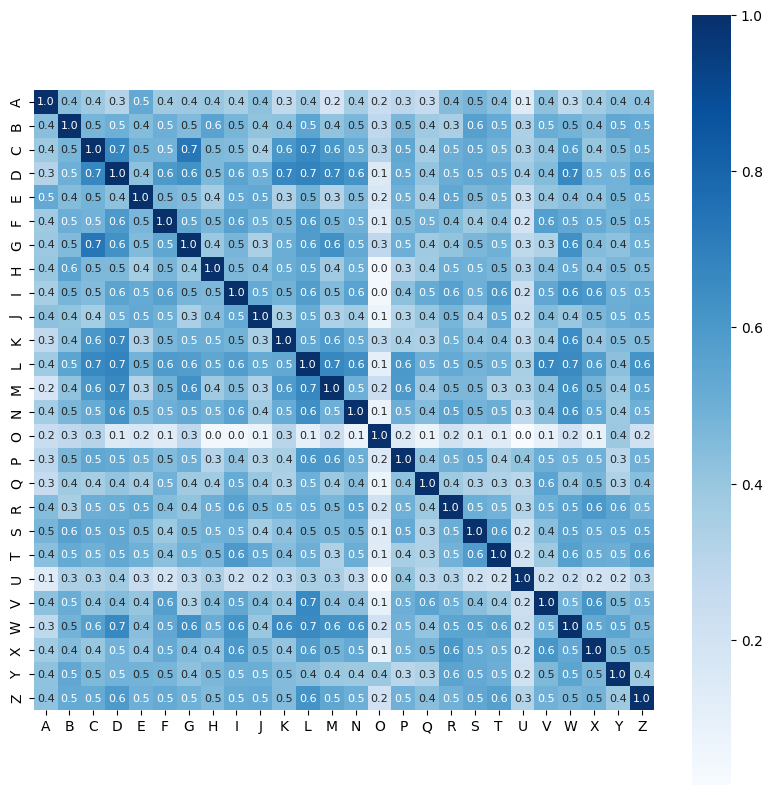

In [195]:
# find the outlier using ocrrealtion heatmpa
correlation = advert_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

The outlier in the data is O, as it is clearly un-correlated to the others (very low correlation values all other participants).<br>
We can assume that this gives an idea of which is the outlier, because in general, people would rate similar things similarly (to some degree), however, seeing some instance that rates completely differently is an indicator of something different with that instance, in such a case being that it was a random rater.<br><br>
Hence, it is clear that the participant that provided random ratings is O.

### 2. Reliable Job: Internal Consistency

In [196]:
# read data from job.csv

job_df = pd.read_csv('job.csv')
job_df

,JS1,JS2,JS3,JS4,JSAVG,JP1,JP2,JP3,JP4,JPAVG
0,9,9.5,9.75,7.875,9.03125,1,1.5,1.75,4.875,2.28125
1,5,6.5,6.25,7.125,6.21875,6,4.0,4.00,7.000,5.25000
2,4,5.0,3.50,6.750,4.81250,5,6.5,5.25,4.625,5.34375
3,6,7.0,5.50,4.750,5.81250,6,7.0,8.50,8.250,7.43750
4,7,7.5,6.75,7.375,7.15625,6,5.0,4.50,9.250,6.18750
5,1,2.5,3.25,3.625,2.59375,9,7.5,4.75,2.375,5.90625
6,1,5.5,7.75,7.875,5.53125,8,8.0,6.00,5.000,6.75000
7,5,7.5,4.75,5.375,5.65625,7,8.5,9.25,5.625,7.59375
8,6,4.0,3.00,2.500,3.87500,2,3.0,6.50,5.250,4.18750
9,1,2.5,3.25,6.625,3.34375,9,9.5,6.75,4.375,7.40625


          JS1       JS2       JS3       JS4
JS1  1.000000  0.824366  0.532531  0.373851
JS2  0.824366  1.000000  0.715501  0.517486
JS3  0.532531  0.715501  1.000000  0.651675
JS4  0.373851  0.517486  0.651675  1.000000


<Axes: >

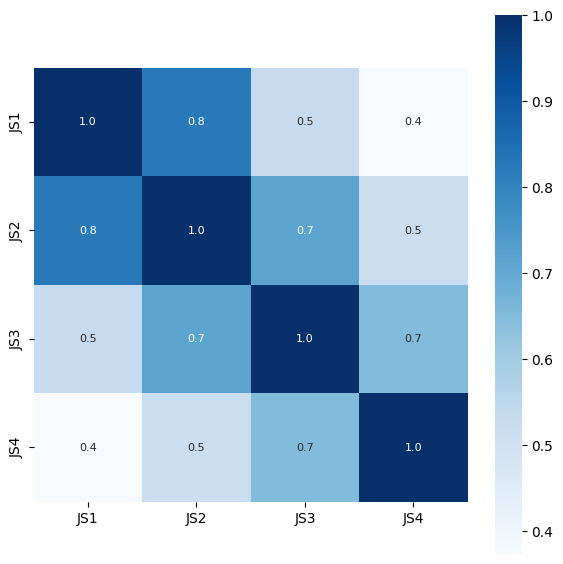

In [197]:
# calculate the Spearman's correlation between JS1, JS2, JS3, JS4
corr = job_df[['JS1', 'JS2', 'JS3', 'JS4']].corr(method = 'spearman')
print(corr)

# plot as a correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [198]:
tri_sum = 0
for row in range(len(corr)):
    for col in range(row):
        if row != col:
            tri_sum += corr.iloc[row, col]

# print(tri_sum)
tri_mean = tri_sum / (len(corr) * (len(corr) - 1) / 2)

print(tri_mean)

0.6025684054632915


In [199]:
# using mean correlation and number of JS items, get cronbach alpha
n = 4
cronbach_alpha = (n * tri_mean) / (1 + ((n - 1) * tri_mean))
cronbach_alpha

0.8584496719182925

          JP1       JP2       JP3       JP4
JP1  1.000000  0.536630  0.127395 -0.010899
JP2  0.536630  1.000000  0.458866  0.038797
JP3  0.127395  0.458866  1.000000  0.145061
JP4 -0.010899  0.038797  0.145061  1.000000


<Axes: >

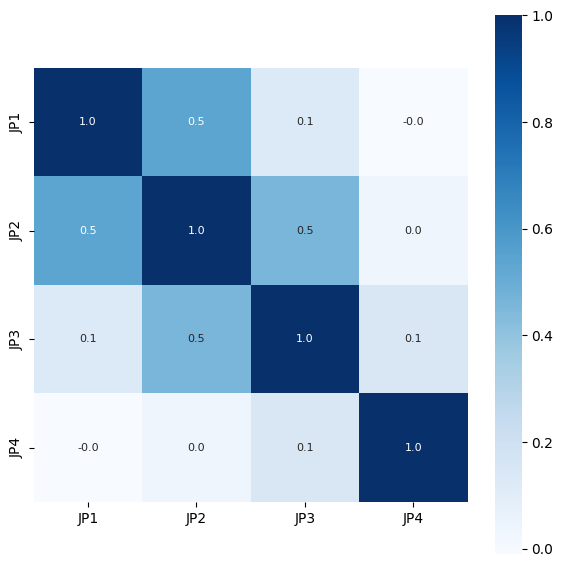

In [200]:
# calculate the Spearman's correlation between JS1, JS2, JS3, JS4
corr = job_df[['JP1', 'JP2', 'JP3', 'JP4']].corr(method='spearman')
print(corr)

# plot as a correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [201]:
tri_sum = 0
for row in range(len(corr)):
    for col in range(row):
        if row != col:
            tri_sum += corr.iloc[row, col]

# print(tri_sum)
tri_mean = tri_sum / (len(corr) * (len(corr) - 1) / 2)

print(tri_mean)

0.215975054705093


In [202]:
# using mean correlation and number of JS items, get cronbach alpha
n = 4
cronbach_alpha = (n * tri_mean) / (1 + ((n - 1) * tri_mean))
cronbach_alpha

0.524235103409064

Cronbach Alpha value indicates the internal consistency of a survey, and can help determine whether a collection of items consistently measures the same characteristic, by measuring the 'agreement' between items.<br><br>
We get a value of 0.86 for the JS columns, which is a high alpha value, indicating that the items are consistent with each other, and hence, reliable.<br>
For the JP columns, we get a value of 0.52, which is a poor 

### 3. Yulu: Normality Testing

In [203]:
# read data from yulu.csv

yulu_df = pd.read_csv('yulu.csv')
yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


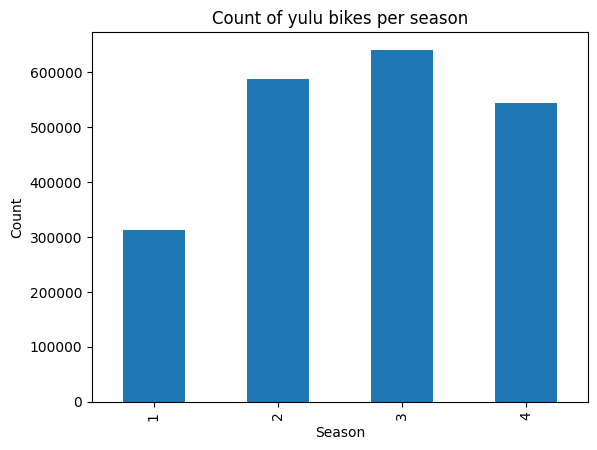

In [204]:
# plot a histogram with four seasons on the x-axis and the sum of 'count' column for that season on the y-axis

yulu_df.groupby('season')['count'].sum().plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of yulu bikes per season')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


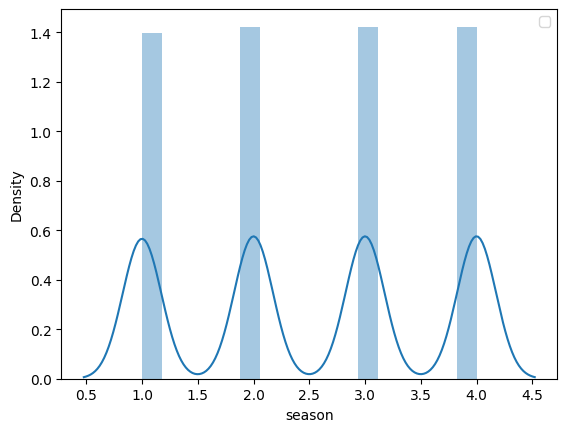

In [205]:
sns.distplot(yulu_df['season'])
plt.legend()
plt.show()

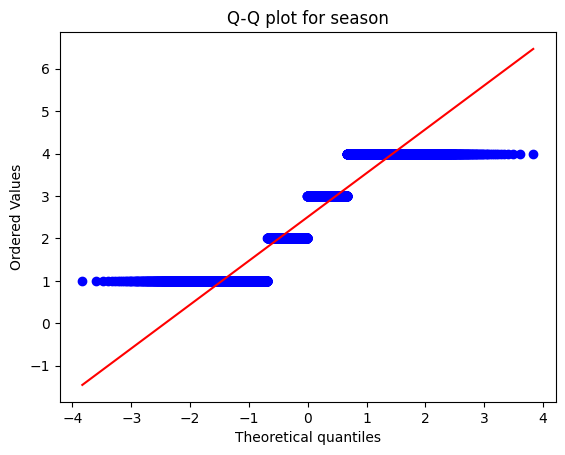

In [206]:
from scipy.stats import probplot

probplot(yulu_df['season'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for season')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


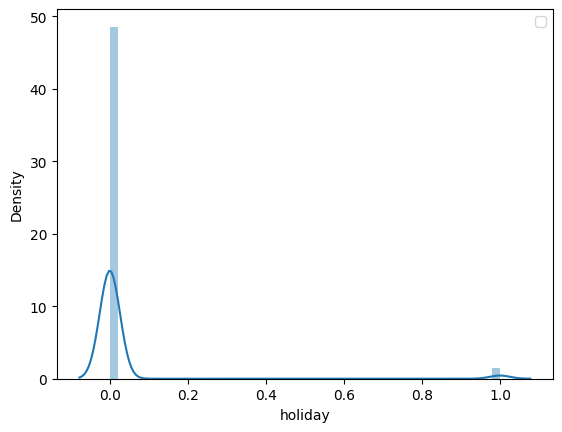

In [207]:
sns.distplot(yulu_df['holiday'])
plt.legend()
plt.show()

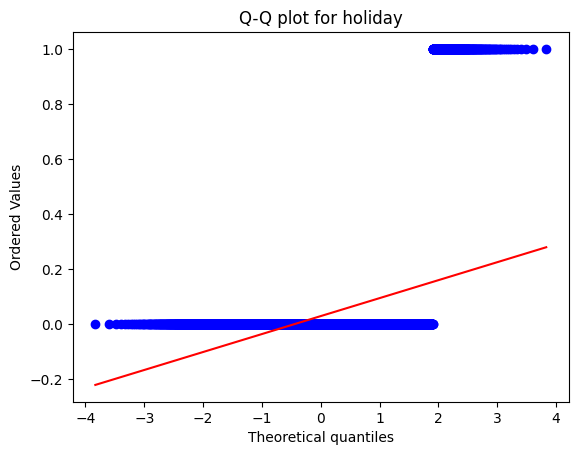

In [208]:
probplot(yulu_df['holiday'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for holiday')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


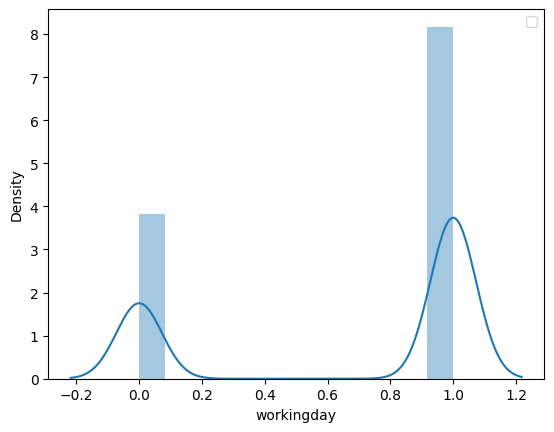

In [209]:
sns.distplot(yulu_df['workingday'])
plt.legend()
plt.show()

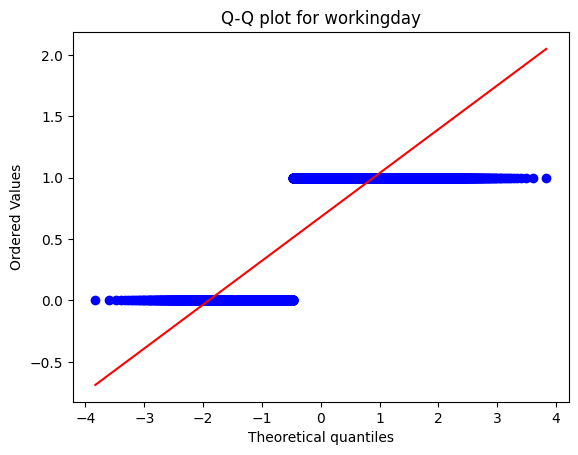

In [210]:
probplot(yulu_df['workingday'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for workingday')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


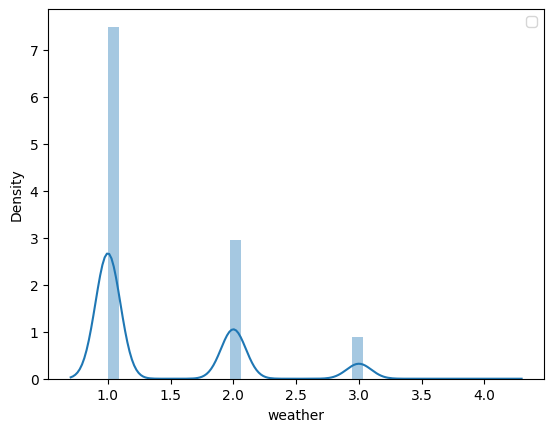

In [211]:
sns.distplot(yulu_df['weather'])
plt.legend()
plt.show()

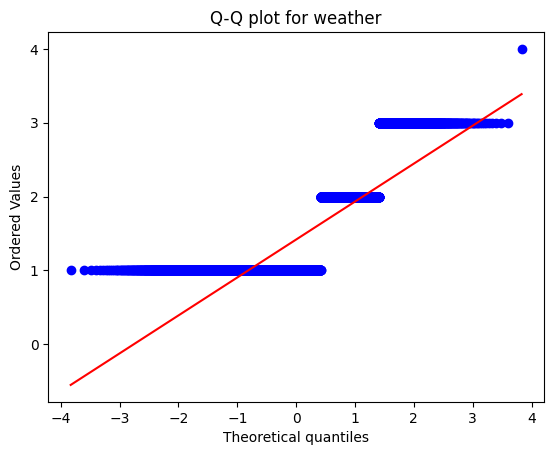

In [212]:
probplot(yulu_df['weather'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for weather')
plt.show()

Clearly, the histgram and q-q plots for nominal variables such as this demonstrate non-normal distributions, as the independent variable is not continuous.<br>
This is the case of season, holiday, weather and working day columns.

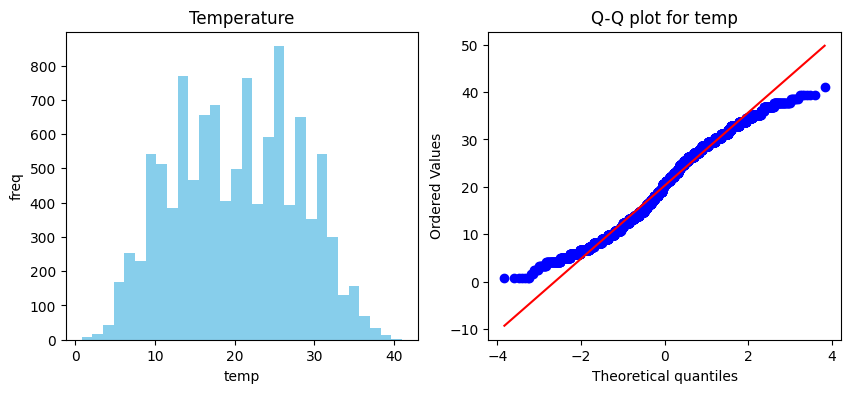

In [213]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['temp'], bins = 30, color = 'skyblue')
plt.title('Temperature')
plt.xlabel('temp')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['temp'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for temp')
plt.show()

In [214]:
# shapiro wilk

from scipy.stats import shapiro

# select a sample of 50 from the 'temp' column
sample = yulu_df['temp']

# perform the shapiro-wilk test
stat, p = shapiro(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.980, p=0.000


We get a p value of 0.0 for all of these columns, which is less than the significance level of 0.05, and hence, we reject the null hypothesis, and conclude that the data is not normally distributed.

One thing of note, is that Shapiro-Wilk is dependent on sample size. We expect n < 50 for Shapiro-Wild usually. So, we can try the Kolmogorov-Smirnov test, which is less dependent on sample size.

In [215]:
# kolmogorov-smirnov

from scipy.stats import kstest

# perform the kolmogorov-smirnov test
stat, p = kstest(sample, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.998, p=0.000


Same result with this test, hence the data is not normally distributed.

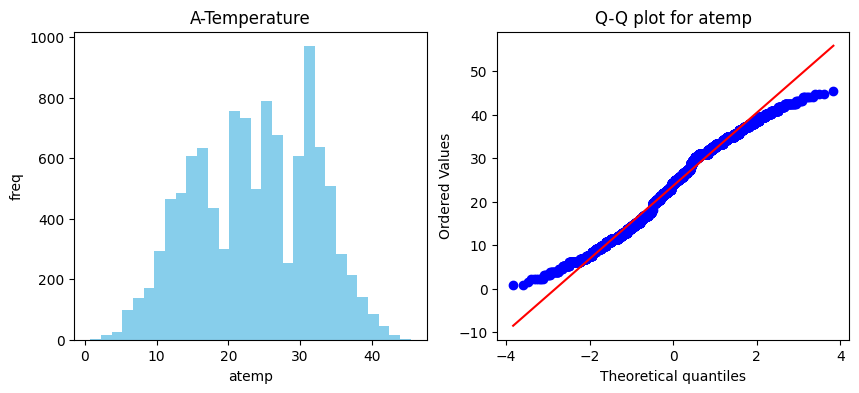

In [216]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['atemp'], bins = 30, color = 'skyblue')
plt.title('A-Temperature')
plt.xlabel('atemp')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['atemp'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for atemp')
plt.show()

In [217]:
# select a sample of 50 from the 'temp' column
sample = yulu_df['atemp']

# perform the shapiro-wilk test
stat, p = shapiro(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.982, p=0.000


Even for this, sample is not normally distributed, as the p-value is lesser than 0.05, and hence we fail to reject the null hypothesis.

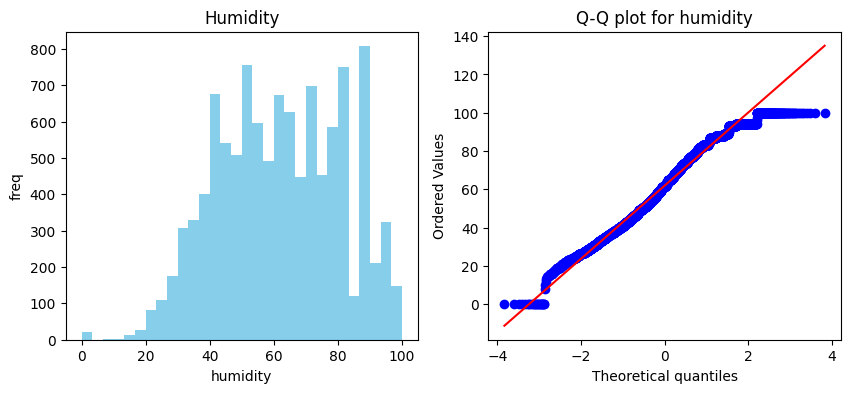

In [218]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['humidity'], bins = 30, color = 'skyblue')
plt.title('Humidity')
plt.xlabel('humidity')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['humidity'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for humidity')
plt.show()

In [219]:

# select a sample of 50 from the 'temp' column
sample = yulu_df['humidity']

# perform the shapiro-wilk test
stat, p = shapiro(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.982, p=0.000


Here, also we fail to reject the null hypothesis, as the p-value is lesser than 0.05, and hence we conclude that the data is normally distributed.

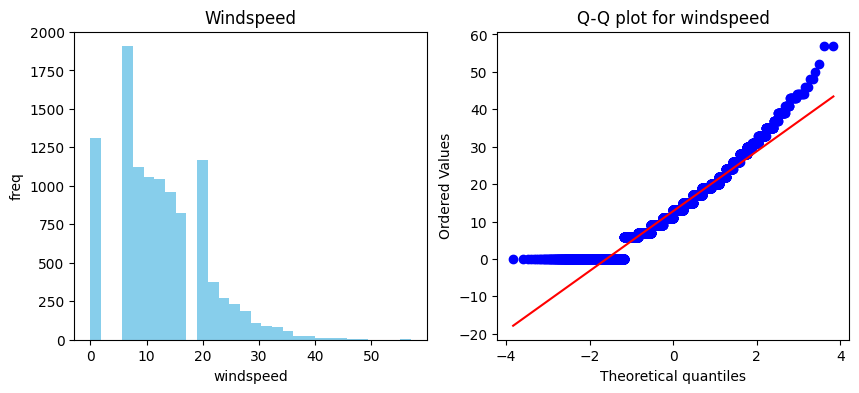

In [220]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['windspeed'], bins = 30, color = 'skyblue')
plt.title('Windspeed')
plt.xlabel('windspeed')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['windspeed'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for windspeed')
plt.show()

In [221]:

# select a sample of 50 from the 'temp' column
sample = yulu_df['windspeed']

# perform the shapiro-wilk test
stat, p = shapiro(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.959, p=0.000


Again, pvalue of 0, so the data is not normal.

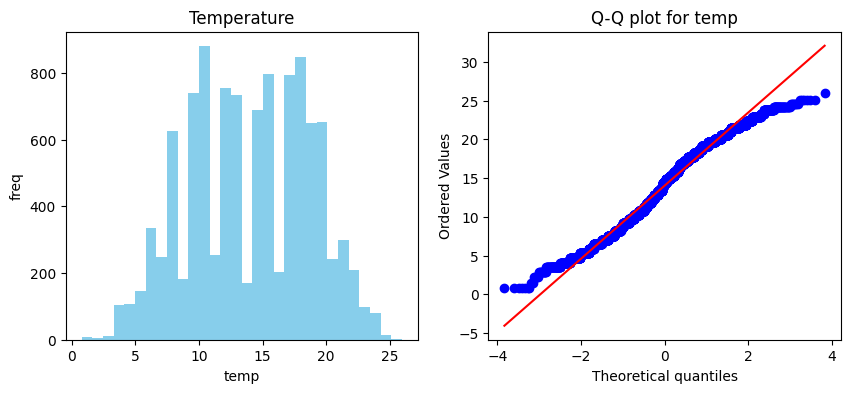

In [222]:
# boxcox

from scipy.stats import boxcox

transformed, lam = boxcox(yulu_df['temp'] + 1)
yulu_df['temp' + '_boxcox'] = transformed

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['temp' + '_boxcox'], bins = 30, color = 'skyblue')
plt.title('Temperature')
plt.xlabel('temp')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['temp' + '_boxcox'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for temp')
plt.show()

In [223]:
# sharpiro wilk

# select a sample of 50 from the 'temp' column
sample = yulu_df['temp' + '_boxcox']

# perform the shapiro-wilk test
stat, p = shapiro(sample)

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.981, p=0.000


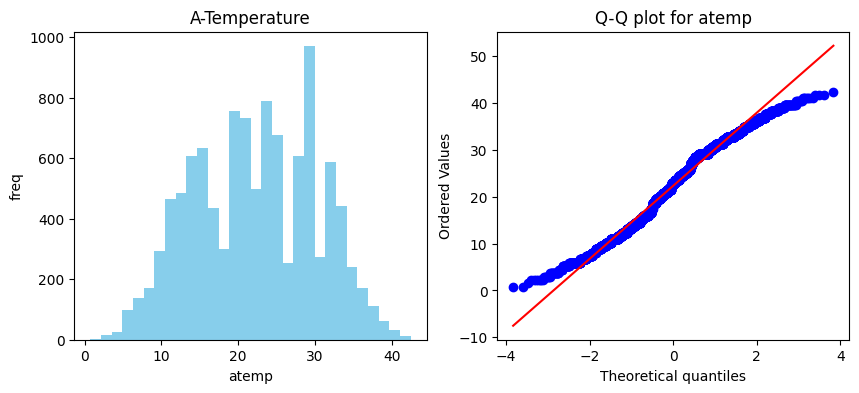

In [224]:
transformed, lam = boxcox(yulu_df['atemp'] + 1)
yulu_df['atemp' + '_boxcox'] = transformed

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['atemp' + '_boxcox'], bins = 30, color = 'skyblue')
plt.title('A-Temperature')
plt.xlabel('atemp')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['atemp' + '_boxcox'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for atemp')
plt.show()

In [225]:
# select a sample of 50 from the 'temp' column
sample = yulu_df['atemp' + '_boxcox']

# perform the shapiro-wilk test
stat, p = shapiro(sample)

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.981, p=0.000


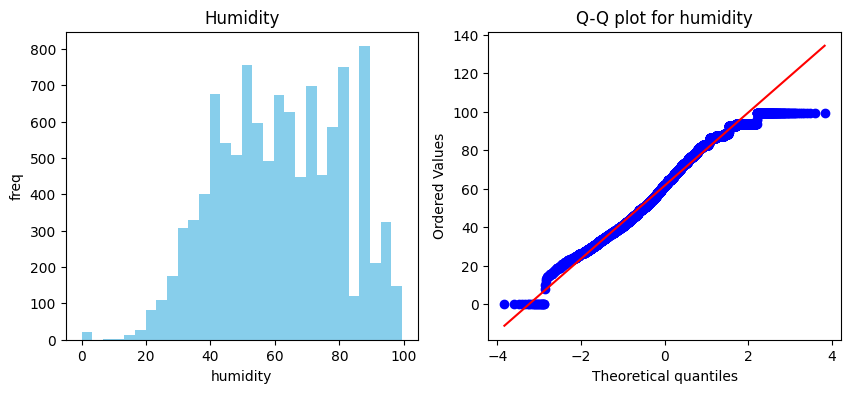

In [226]:
transformed, lam = boxcox(yulu_df['humidity'] + 1)
yulu_df['humidity' + '_boxcox'] = transformed

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['humidity' + '_boxcox'], bins = 30, color = 'skyblue')
plt.title('Humidity')
plt.xlabel('humidity')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['humidity' + '_boxcox'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for humidity')
plt.show()

In [227]:
# select a sample of 50 from the 'temp' column
sample = yulu_df['humidity' + '_boxcox']

# perform the shapiro-wilk test
stat, p = shapiro(sample)

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.982, p=0.000


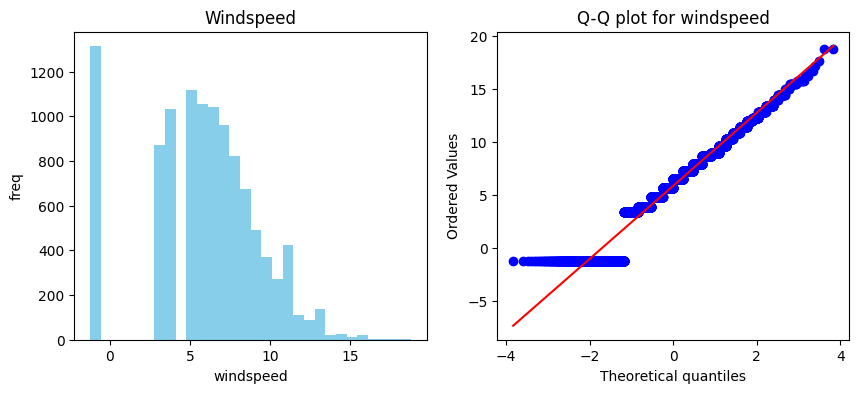

In [228]:
# Find the minimum value in the 'windspeed' column
min_val = yulu_df['windspeed'].min()

# If the minimum value is less than or equal to 0, add the absolute value of min_val plus a small constant to all values
if min_val <= 0:
    yulu_df['windspeed'] = yulu_df['windspeed'] + abs(min_val) + 0.1

transformed, lam = boxcox(yulu_df['windspeed'])
yulu_df['windspeed' + '_boxcox'] = transformed

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(yulu_df['windspeed' + '_boxcox'], bins = 30, color = 'skyblue')
plt.title('Windspeed')
plt.xlabel('windspeed')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
probplot(yulu_df['windspeed' + '_boxcox'], dist = 'norm', plot = plt)
plt.title('Q-Q plot for windspeed')
plt.show()

In [229]:
# select a sample of 50 from the 'temp' column
sample = yulu_df['windspeed' + '_boxcox']

# perform the shapiro-wilk test
stat, p = shapiro(sample)

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.948, p=0.000


In [230]:
# !pip install pingouin

In [231]:
from pingouin import partial_corr

# change columns from 1 onwards into numeric
yulu_df.iloc[:, 1:] = yulu_df.iloc[:, 1:].apply(pd.to_numeric)

In [232]:
cols = yulu_df.select_dtypes(include=[np.number]).columns

# calculate the partial correlation between 'temp' and 'count' while controlling for 'atemp'
partial_corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns = cols, index = cols)

for i, column1 in enumerate(cols):
    for j, column2 in enumerate(cols):
        if i != j:
            partial_corr_result = partial_corr(yulu_df, x = column1, y = column2)
            partial_corr_matrix.loc[column1, column2] = partial_corr_result['r'].values[0]

print(partial_corr_matrix)

                    season   holiday  workingday   weather      temp   
season            0.000000  0.029368   -0.008126  0.008879  0.258689  \
holiday           0.029368  0.000000   -0.250491 -0.007074  0.000295   
workingday       -0.008126 -0.250491    0.000000  0.033772  0.029966   
weather           0.008879 -0.007074    0.033772  0.000000 -0.055035   
temp              0.258689  0.000295    0.029966 -0.055035  0.000000   
atemp             0.264744 -0.005215    0.024660 -0.055376  0.984948   
humidity          0.190610  0.001929   -0.010880  0.406244 -0.064949   
windspeed        -0.147121  0.008409    0.013373  0.007261 -0.017852   
casual            0.096758  0.043799   -0.319111 -0.135918  0.467097   
registered        0.164011 -0.020956    0.119460 -0.109340  0.318571   
count             0.163439 -0.005393    0.011594 -0.128655  0.394454   
temp_boxcox       0.265482 -0.001249    0.030126 -0.050461  0.999362   
atemp_boxcox      0.265705 -0.005430    0.024727 -0.054721  0.98

<Axes: >

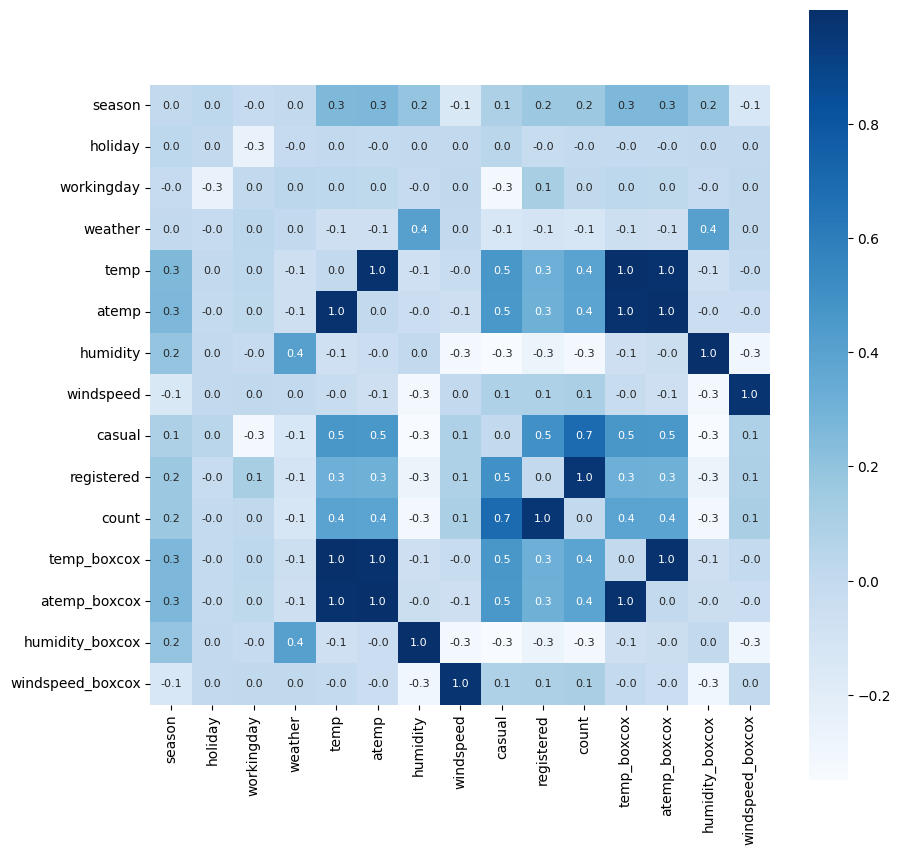

In [233]:
# plot the partial correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(partial_corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


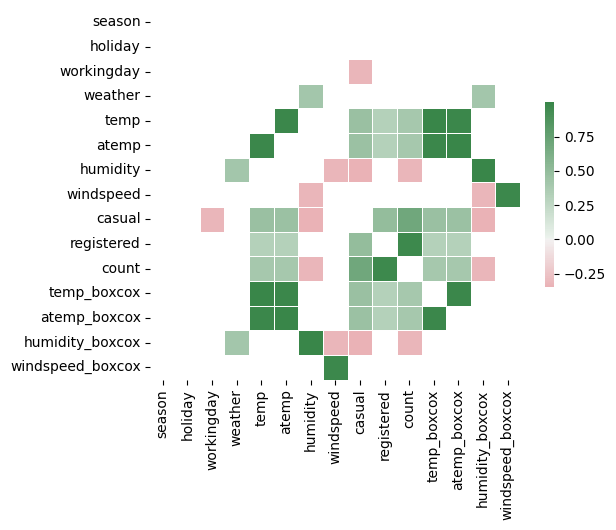

In [234]:
# Assuming corr_matrix is your correlation matrix
corr_matrix = partial_corr_matrix

# Create a mask for values greater than 0.3 or less than -0.3
mask = (corr_matrix > 0.3) | (corr_matrix < -0.3)

# Create a custom colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr_matrix, mask=~mask, cmap=cmap, center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Answers:

##### 1. 
Exploratory data yields that none of the variables are normally distributed. The data is large, so the Shapiro Wilk test does not directly apply, but even after sampling we can see that the tests fail to reject the null hypothesis, and hence we can conclude that the data is not normally distributed.

##### 2.
We add small values in all the Box-Cos transforms to prevent error from arising, by adding the min value along with some small value before calling the inbuilt function. This prevents this error.

##### 3.
Semi-partial and partial correlations exist for some variables. We cannot really comment for sure on the nominal variables.<br><br> For example, there is a high negative correlation between humidity and count, which indicates a negative relationship. We can maybe say that when humidity is high, less people choose to use Yulu for transport.<br><br>
In addition, we see a positive correlation with temperature. Now, Yulu is primarily used in Bangalore city, where the highest temperatures are not very extreme, which means it is possible that when temperatures are relatively high, people would choose to ride Yulu. This can potentially explain this positive relationship.<br><br>

The casual column behaves quite similar to the count column by and large. This is potentially indicating that most users are casual users, perhaps, and that the average Yulu user probably behaves as a casual user does.<br><br>
